In [57]:
%matplotlib inline
import scipy as sp
import matplotlib.pyplot as plt
import mousai as ms
from scipy import pi

In [5]:
help(ms.hb_so)

Help on function hb_so in module mousai.har_bal:

hb_so(sdfunc, x0, omega=1, method='newton_krylov', num_harmonics=1, params={}, **kwargs)
    Harmonic balance solver for second order ODEs.
    
    Obtains the solution of a second order differential equation under the
    presumption that the solution is harmonic.
    
    Returns t (time), x (displacement), v (velocity), and a (acceleration)
    response of a second order linear ordinary differential
    equation defined by
    :math:`\ddot{\mathbf{x}}=f(\mathbf{x},\mathbf{v},\omega)`.
    
    Parameters
    ----------
    sdfunc: str
        name of function that returns **column vector** second derivative
        given omega and
        \*\*kwargs
    
        :math:`\ddot{\mathbf{x}}=f(\mathbf{x},\mathbf{v},\omega)`
    omega:  float
        assumed fundamental response frequency in radians per second.
    num_harmonics: int
        number of harmonics to presume. omega = 0 constant term is always
        presumed to exist. Minim

In [13]:
sp.linspace?

In [21]:
omega = sp.linspace(0,2,201)+1/200

In [22]:
t, x, e, amps, phases = ms.hb_so('duff_osc', sp.array([[0,1,-1]]), .7)

In [23]:
amps[0]

1.4652054368868992

In [24]:
amp = sp.zeros_like(omega)

In [131]:
def duff_osc2(x, v, params):
    # print('duff osc')
    # print(reduced_kwargs)
    omega = params['omega']
    t = params['cur_time']
    '''print('t=',t)
    print('x = ', x)
    print('v = ', v)'''
    return -x-.000*x**3-.01*v+sin(omega*t)

In [132]:
omega = sp.linspace(0,3,200)+1/200
amp = sp.zeros_like(omega)
x = sp.array([[0,1,-1]])
for i, freq in enumerate(omega):
    #print(i,freq,x)
    t, x, e, amps, phases = ms.hb_so('duff_osc2', x, freq)#, callback = resid)
    amp[i]=amps[0]
plt.plot(omega, amp)

KeyError: 'duff_osc2'

In [133]:
globals()['duff_osc2']

<function __main__.duff_osc2>

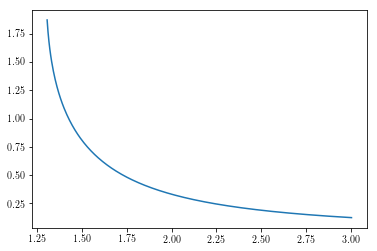

In [130]:
omegal = sp.arange(3,1.295,-1/200)+1/200
ampl = sp.zeros_like(omegal)
x = sp.array([[0,-1,1]])
for i, freq in enumerate(omegal):
    #print(i,freq,x, "freq:",freq, phases)
    t, x, e, amps, phases = ms.hb_so('duff_osc', x, freq)#, f_tol = 1e-10)#, callback = resid)
    ampl[i]=amps[0]
plt.plot(omegal, ampl)

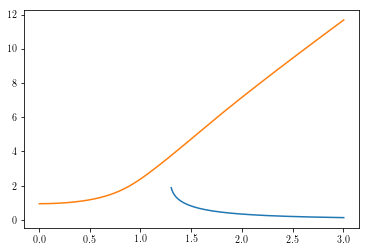

In [127]:
plt.plot(omegal,ampl)
plt.plot(omega,amp)

In [90]:
from scipy.optimize import newton_krylov

In [91]:
help(newton_krylov)

Help on function newton_krylov in module scipy.optimize.nonlin:

newton_krylov(F, xin, iter=None, rdiff=None, method='lgmres', inner_maxiter=20, inner_M=None, outer_k=10, verbose=False, maxiter=None, f_tol=None, f_rtol=None, x_tol=None, x_rtol=None, tol_norm=None, line_search='armijo', callback=None, **kw)
    Find a root of a function, using Krylov approximation for inverse Jacobian.
    
    This method is suitable for solving large-scale problems.
    
    Parameters
    ----------
    F : function(x) -> f
        Function whose root to find; should take and return an array-like
        object.
    x0 : array_like
        Initial guess for the solution
    rdiff : float, optional
        Relative step size to use in numerical differentiation.
    method : {'lgmres', 'gmres', 'bicgstab', 'cgs', 'minres'} or function
        Krylov method to use to approximate the Jacobian.
        Can be a string, or a function implementing the same interface as
        the iterative solvers in `scip

In [98]:
def resid(x,f):
    print(f)

In [104]:
sp.arange(1,0,-.1)

array([ 1. ,  0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1])